# AMES housing dataset

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-and-perform-Exploratory-Data-Analysis" data-toc-modified-id="Importing-and-perform-Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing and perform Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Import-necessary-libraries-and-data-into-environment" data-toc-modified-id="Import-necessary-libraries-and-data-into-environment-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import necessary libraries and data into environment</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Analyzing-datatypes-of-importaned-data" data-toc-modified-id="Analyzing-datatypes-of-importaned-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Analyzing datatypes of importaned data</a></span></li></ul></li><li><span><a href="#Exploring-Missing-values-by-rows" data-toc-modified-id="Exploring-Missing-values-by-rows-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploring Missing values by rows</a></span></li><li><span><a href="#Impute-Columns" data-toc-modified-id="Impute-Columns-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Impute Columns</a></span><ul class="toc-item"><li><span><a href="#Drop-independent-features-that-are-highly-correlated-with-each-other" data-toc-modified-id="Drop-independent-features-that-are-highly-correlated-with-each-other-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Drop independent features that are highly correlated with each other</a></span></li></ul></li><li><span><a href="#Generate-predictions-on-test-set" data-toc-modified-id="Generate-predictions-on-test-set-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Generate predictions on test set</a></span></li></ul></li></ul></div>

In this notebook we will explore a housing dataset and attempt to build a machine learning model that will predict the price of a house given the set of features

## Importing and perform Exploratory Data Analysis

2. Cleaning and Imputation
3. Feature engineering
4. Building a model
5. Reiterate steps to create a better model

### Import necessary libraries and data into environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
raw_data = pd.read_csv('data/train.csv')

In [3]:
raw_data.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Keep Below 25 features

Clean the column names by replacing spaces with underscore and lowercase all

In [4]:
raw_data.columns = [ col.strip().replace(" ","_").lower() for col in raw_data.columns]

### Exploratory data analysis

In [5]:
# Datatypes of data in pandas
raw_data.dtypes

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
                 ...   
misc_val          int64
mo_sold           int64
yr_sold           int64
sale_type        object
saleprice         int64
Length: 81, dtype: object

In [7]:
# Statistical overview of all features 
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
ms_subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot_frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas_vnr_area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [8]:
# Get info of all features
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

In [15]:
# Obtain some statistics about missing data by columns
na_cols_stats = [ [x[0],x[1]] for x in raw_data.isnull().sum().items() if x[1] > 0]  
na_cols_stats = sorted(na_cols_stats, key= lambda x: x[1],reverse=True)
# na_cols_stats
print("\n".join([ "{} has {} nan rows".format(col,na_rows) for col, na_rows in na_cols_stats[:9] ]))

pool_qc has 2042 nan rows
misc_feature has 1986 nan rows
alley has 1911 nan rows
fence has 1651 nan rows
fireplace_qu has 1000 nan rows
lot_frontage has 330 nan rows
garage_yr_blt has 114 nan rows
garage_finish has 114 nan rows
garage_qual has 114 nan rows


In [11]:
# Check if the these columns have a high correlation with saleprice
corr_cols = ['pool_qc','misc_feature','alley','fence','fireplace_qu','lot_frontage','garage_yr_blt','garage_finish','garage_qual','saleprice']
raw_data[corr_cols].dtypes

pool_qc           object
misc_feature      object
alley             object
fence             object
fireplace_qu      object
lot_frontage     float64
garage_yr_blt    float64
garage_finish     object
garage_qual       object
saleprice          int64
dtype: object

In [12]:
df_na = pd.get_dummies(raw_data[corr_cols],drop_first=False)

In [13]:
df_corr = df_na.corr().loc['saleprice',:] 
df_corr[(df_corr>0.4) | (df_corr < -0.4)]

garage_yr_blt        0.533922
saleprice            1.000000
garage_finish_Fin    0.422936
garage_finish_Unf   -0.432220
Name: saleprice, dtype: float64

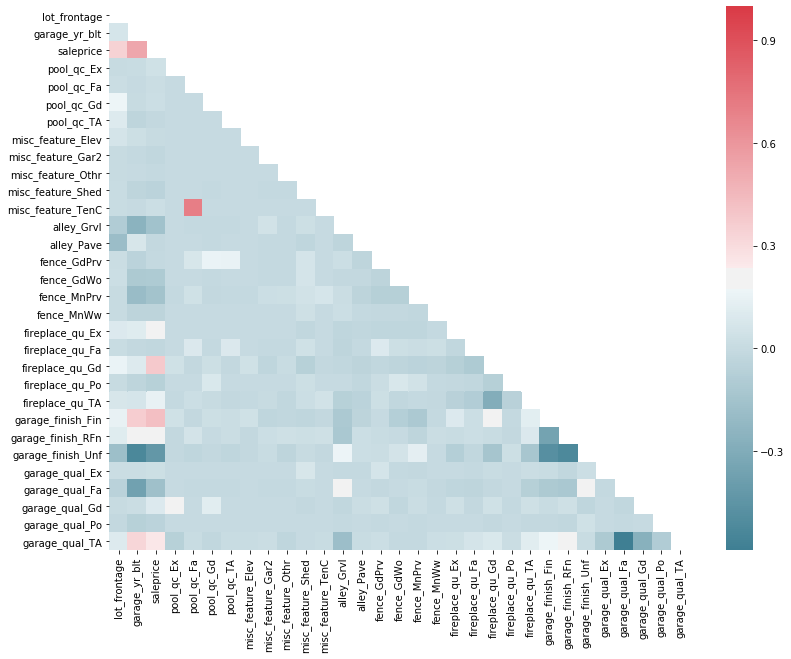

In [130]:
import seaborn as sns
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(df_na.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(13,10))
ax = sns.heatmap(df_na.corr(), ax=ax, cmap=cmap, mask=mask)

The correlation matrix shows that garagee_finish_Unf may have a high correlation with saleprice

In [15]:
raw_data.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [16]:
na_cols = ['pool_qc','misc_feature','alley','fence','fireplace_qu','lot_frontage','garage_yr_blt','garage_finish','garage_qual']

In [17]:
na_cols2 = ['pool_qc','misc_feature','alley','fence','fireplace_qu','garage_finish','garage_qual','saleprice']

In [123]:
print(type(ax))

<class 'numpy.ndarray'>


cols:['saleprice', 'pool_qc']
cols:['saleprice', 'misc_feature']
cols:['saleprice', 'alley']
cols:['saleprice', 'fence']
cols:['saleprice', 'fireplace_qu']
cols:['saleprice', 'garage_finish']
cols:['saleprice', 'garage_qual']


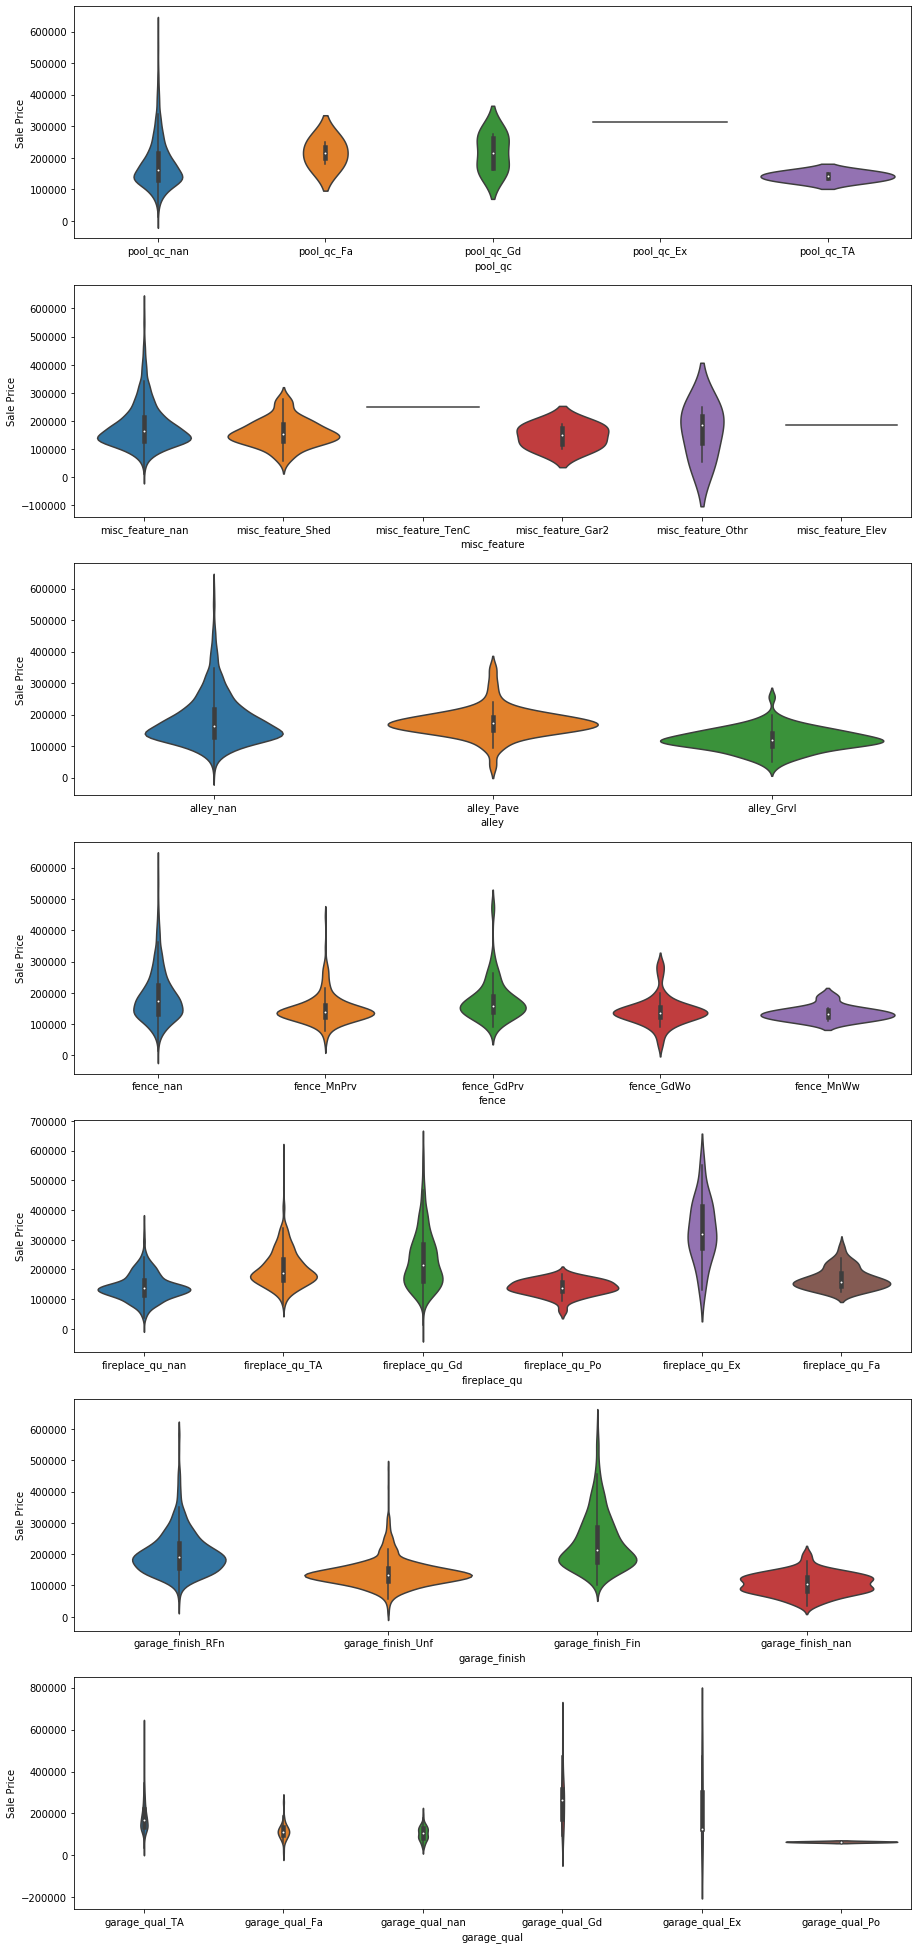

In [214]:

def subplots(df,columns,ppr=1,figsize=(15,5),plot_func=sns.boxplot, sharex=True, sharey=True,plotargs=None):
    # Get number of rows
    num_rows = int(np.ceil(len(columns)/ppr))
    if 'saleprice' in columns:
        num_rows-= 1
    
    # Scale height to number of rows
    if figsize:
        figsize=(figsize[0],num_rows*figsize[1])


    if plot_func == sns.pairplot:
        if plotargs:
            sns.pairplot(df[columns],**plotargs)
        else:
            sns.pairplot(df[columns])
    if (plot_func == sns.boxplot) or (plot_func == sns.violinplot):

        fig, ax = plt.subplots(num_rows, ppr,figsize=figsize, sharex=sharex,sharey=sharey)
        if num_rows > 1:
            ax = ax.ravel()
            
            
        for i,col in enumerate(columns):
                if col == 'saleprice':
                    break
                if num_rows > 1:
                    axes=ax[i]
                else:
                    axes = ax
                
#                 print("axes shape:{}".format(axes.shape))
                    
                
                cols = ['saleprice']
                cols.append(col)
                print("cols:{}".format(cols))
                pd_melted = pd.melt(df[cols], id_vars=['saleprice'], var_name='key')
                pd_melted['kv'] = pd_melted['key'].map(str) + '_' + pd_melted['value'].map(str)

                pt = plot_func(x='kv', y='saleprice', data=pd_melted, ax=axes);
                pt.set_ylabel('Sale Price')
                pt.set_xlabel(col)

        
subplots(raw_data,na_cols2, ppr=1, plot_func=sns.violinplot, sharex=False,sharey=False)
    

cols:['saleprice', 'garage_qual']


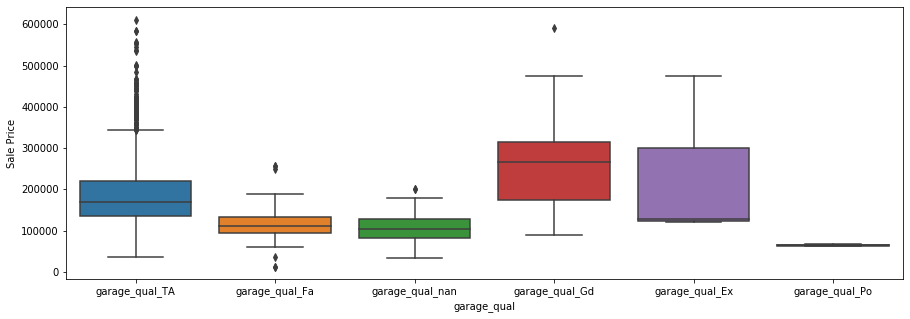

In [141]:
subplots(raw_data,['garage_qual'], ppr=1, plot_func=sns.boxplot, sharex=False,sharey=False)

From the boxplot we can roughly infer that 
- Homes with Ex (Excellent) under fireplace_qu does have a visibly higher median for sale price compared to the other categories
- Homes with Fin (Finished)  for garage_fin feature has a visibly higher median for sale price


Due to the number of missing data by columns and a low significance of these categorical variables on the sale price, these few features will be dropped:

- Pool QC has 2042 empty rows
- Fireplace Qu has 1000 empty rows
- Fence has 1651 NA rows
- Misc Feature has 1986 NA rows
- Alley has 1911 NA rows

From the observations, 



The way to statistically check for relationships between categorical/nominal variables with a continuous variable (saleprice) is by using a one way ANOVA test, which assume that the distribution of the continuous variable should be the same across each category

In [20]:
raw_data['gr_liv_area'].sort_values(ascending=False)

# Drop index 960 and 1885 as they are outliers


960     5642
1885    5095
616     3820
1897    3672
1035    3608
        ... 
1292     498
1643     492
1518     480
432      438
1428     334
Name: gr_liv_area, Length: 2051, dtype: int64

In [145]:
df = raw_data.drop(labels=[960,1885] , axis=0)

In [148]:
df['gr_liv_area'].sort_values(ascending=False)

616     3820
1897    3672
1035    3608
1692    3500
1939    3493
        ... 
1292     498
1643     492
1518     480
432      438
1428     334
Name: gr_liv_area, Length: 2049, dtype: int64

In [34]:
na_stats = df[na_cols].isna().sum()/df.shape[0] * 100
[ "{:0.4g}% empty rows for {} ".format(pct,col) for pct,col in zip(na_stats,na_cols) ]

['99.61% empty rows for pool_qc ',
 '96.88% empty rows for misc_feature ',
 '93.17% empty rows for alley ',
 '80.48% empty rows for fence ',
 '48.8% empty rows for fireplace_qu ',
 '16.11% empty rows for lot_frontage ',
 '5.564% empty rows for garage_yr_blt ',
 '5.564% empty rows for garage_finish ',
 '5.564% empty rows for garage_qual ']

In [514]:
raw_data.lot_frontage.var()

541.0579976487439

Based on the number of empty rows in these columns, we will drop these columns:
- pool_qc
- misc_feature
- alley
- fence
- fireplace_qu

id and pid columns will also be dropped as they present no signifcant value for predicting the prices.

Investigate which features should be included in the machine learning model

| Feature | Type | Description  |   |   |
|--------|------|---|---|---|
|MS SubClass|Nominal|Identifies the type of dwelling involved in the sale.|   |   |
|MS Zoning|Nominal|Identifies the general zoning classification of the sale.|   |   |
|        |      |   |   |   |

cols:['saleprice', 'street']


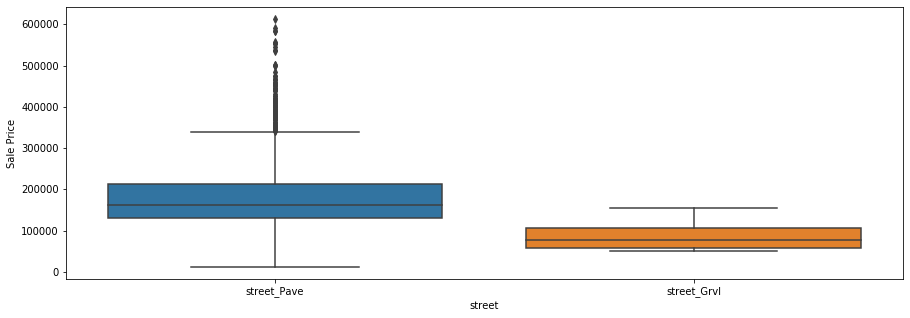

In [150]:
subplots(df,columns=['street','saleprice'])


In [515]:
drop_cols = {'pool_qc','misc_feature','alley','fence','fireplace_qu','id','pid'}

In [516]:
df = raw_data[[col for col in raw_data.columns if col not in drop_cols]]

### Exploring Missing values by rows

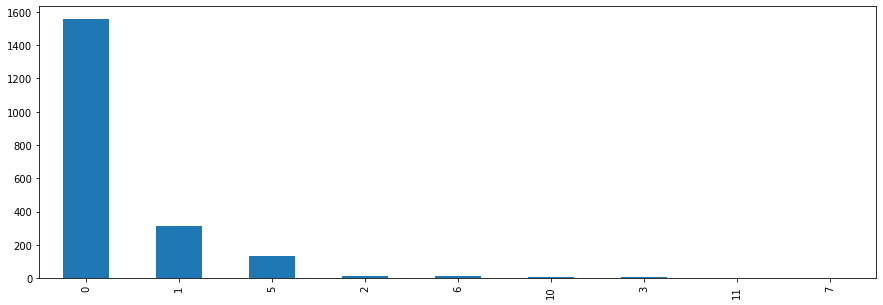

In [517]:
# Missing values along axis=1
# Statistics for missing values by rows
na_rows_stats = df.isnull().sum(axis=1)
missing_cols_in_row = na_rows_stats.sort_values(ascending=False).value_counts()
missing_cols_in_row.plot.bar(figsize=(15,5));

In [518]:
[ "{} rows with {} na columns".format(count,miss) for miss, count in missing_cols_in_row.items() ] 

['1556 rows with 0 na columns',
 '314 rows with 1 na columns',
 '134 rows with 5 na columns',
 '15 rows with 2 na columns',
 '14 rows with 6 na columns',
 '8 rows with 10 na columns',
 '6 rows with 3 na columns',
 '2 rows with 11 na columns',
 '2 rows with 7 na columns']

In [92]:
[ "{} : {}".format(k,v) for k,v in raw_data.iloc[1327].items() ]

['ms_subclass : 20',
 'ms_zoning : RM',
 'lot_frontage : 99.0',
 'lot_area : 5940',
 'street : Pave',
 'lot_shape : IR1',
 'land_contour : Lvl',
 'utilities : AllPub',
 'lot_config : FR3',
 'land_slope : Gtl',
 'neighborhood : BrkSide',
 'condition_1 : Feedr',
 'condition_2 : Norm',
 'bldg_type : 1Fam',
 'house_style : 1Story',
 'overall_qual : 4',
 'overall_cond : 7',
 'year_built : 1946',
 'year_remod/add : 1950',
 'roof_style : Gable',
 'roof_matl : CompShg',
 'exterior_1st : MetalSd',
 'exterior_2nd : CBlock',
 'mas_vnr_type : None',
 'mas_vnr_area : 0.0',
 'exter_qual : TA',
 'exter_cond : TA',
 'foundation : PConc',
 'bsmt_qual : nan',
 'bsmt_cond : nan',
 'bsmt_exposure : nan',
 'bsmtfin_type_1 : nan',
 'bsmtfin_sf_1 : nan',
 'bsmtfin_type_2 : nan',
 'bsmtfin_sf_2 : nan',
 'bsmt_unf_sf : nan',
 'total_bsmt_sf : nan',
 'heating : GasA',
 'heating_qc : TA',
 'central_air : Y',
 'electrical : FuseA',
 '1st_flr_sf : 896',
 '2nd_flr_sf : 0',
 'low_qual_fin_sf : 0',
 'gr_liv_area : 89

We will attempt to address the the missing values through imputation

In [173]:
pd.get_dummies(df['ms_subclass'],)

,20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2047,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2048,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2049,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [195]:
df.lot_area

0       13517
1       11492
2        7922
3        9802
4       14235
        ...  
2046    11449
2047    12342
2048     7558
2049    10400
2050     7500
Name: lot_area, Length: 2051, dtype: int64

In [206]:
ms_subclass_df = df.groupby('ms_subclass')[['ms_subclass','lot_area','saleprice']].median()
ms_subclass_df

,ms_subclass,lot_area,saleprice
ms_subclass,,,
20,20.0,10084.0,160000.0
30,30.0,7741.0,99500.0
40,40.0,7977.0,122500.0
45,45.0,6120.0,113000.0
50,50.0,8390.0,129675.0
60,60.0,10530.0,215100.0
70,70.0,9021.0,147500.0
75,75.0,10200.0,163500.0
80,80.0,10165.5,165000.0


In [282]:
ms_subclass_df = df.groupby('ms_subclass')['saleprice'].agg(saleprice=np.median,max=np.max).reset_index()
ms_subclass_df

,ms_subclass,saleprice,max
0,20,160000,611657
1,30,99500,168000
2,40,122500,152000
3,45,113000,139400
4,50,129675,410000
5,60,215100,584500
6,70,147500,266500
7,75,163500,475000
8,80,165000,345000
9,85,150950,198500


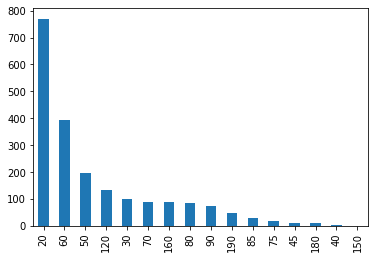

In [290]:
df.ms_subclass.value_counts().plot.bar()

The housing data are predomidently from the following categories in descending order (Top 3 only):
1. 1-STORY 1946 & NEWER ALL STYLES category 
2. 2-STORY 1946 & NEWER
3. 1-1/2 STORY FINISHED ALL AGES

That would mean our model will do a better job at predicting the price of houses on these 3 categories better than the rest since we have more training data available.

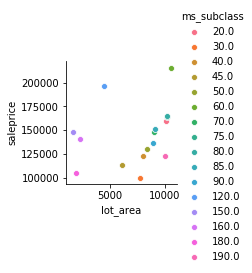

In [225]:
# Scatter plot, x: lot_area, y=saleprice , hue = ms_subclass
sns.pairplot(data=ms_subclass_df, x_vars='lot_area', y_vars='saleprice', hue='ms_subclass')

In [293]:
df.ms_zoning.value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

2. Investigating the relationsip between MS Zoning Feature and Sale Price


cols:['saleprice', 'ms_zoning']


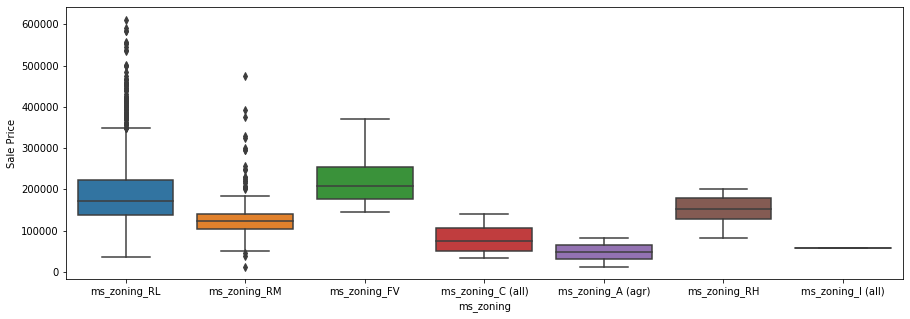

In [294]:
subplots(df, columns=['ms_zoning'])

From the boxplot, it appears that zones such as FV (Floating Village) and RL (Residential Low Density) have a higher median price than the rest. The zoning feature should be maintained as a predictor for the model.

In [297]:
df.ms_zoning.isnull().any()
# There are no empty values in ms_zoning

False

In [300]:
cols = ['street','lot_shape','land_contour','utilities']

cols:['saleprice', 'street']
cols:['saleprice', 'lot_shape']
cols:['saleprice', 'land_contour']
cols:['saleprice', 'utilities']


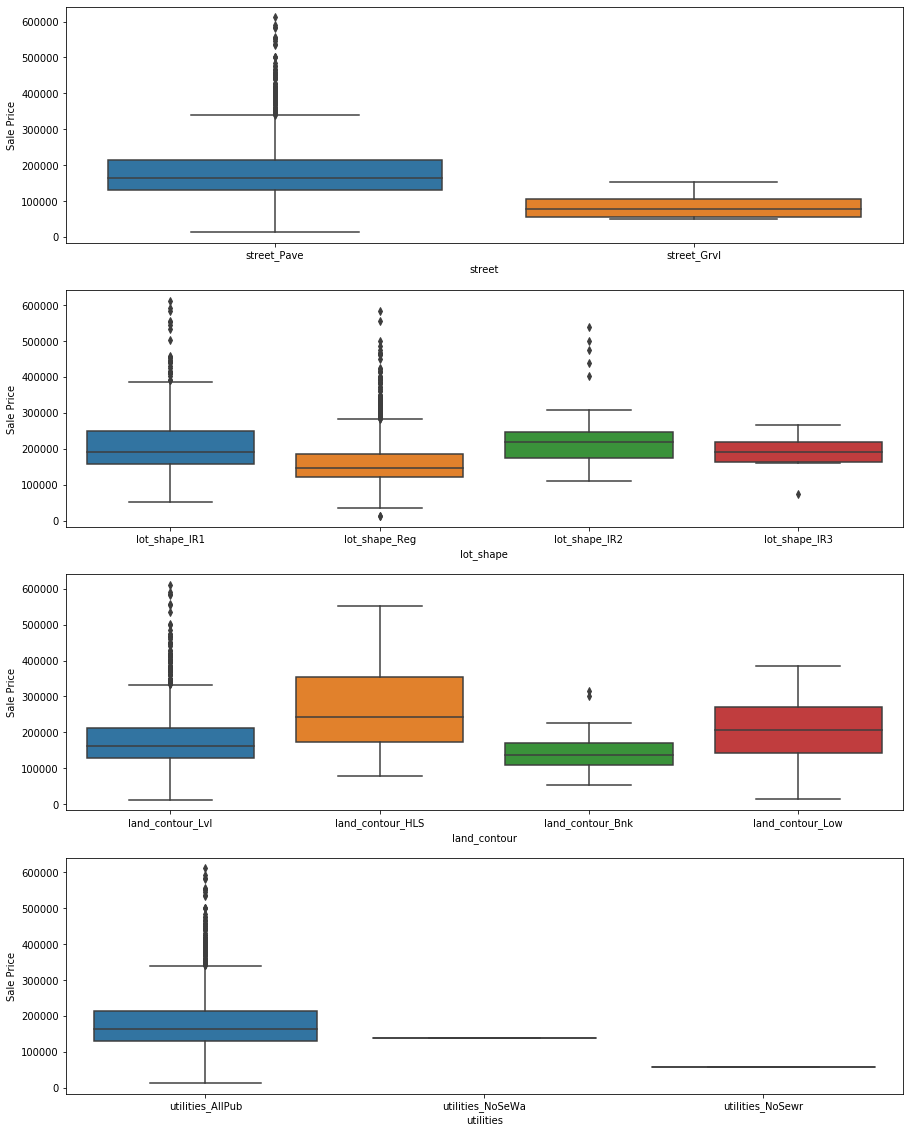

In [303]:
subplots(df, cols, sharex=False,sharey=False)

In [519]:
# These are columns with N/A counts 
cols_check = pd.DataFrame(df.isna().sum()).reset_index()
cols_check.columns=['feature','null_count']
cols_with_null = cols_check[cols_check.iloc[:,1] > 0].sort_values(by='null_count',ascending=False)

In [520]:
cols_with_null

,feature,null_count
2,lot_frontage,330
56,garage_yr_blt,114
60,garage_qual,114
57,garage_finish,114
61,garage_cond,114
55,garage_type,113
30,bsmt_exposure,58
33,bsmtfin_type_2,56
31,bsmtfin_type_1,55
29,bsmt_cond,55


In [386]:
df.garage_yr_blt.unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [388]:
df.bsmt_exposure.unique()

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)


|Feature|Type|Number of Null|Description|
|---|---|---|---|
|Pool QC|Object|2042| Null Value should be NA(Ordinal)|
|Misc Feature|Object|1986| Null Value should be NA(Ordinal)|
|Alley|Object|1911|Null Value should be NA(Nominal)|
|Fence|Object|1651|Null Value should be NA(Ordinal)|
|Fireplace Qu|Object|1000|Null Value should be NA(Ordinal)|
|Lot Frontage|Int|330|Null Value should be Null/0(Continous)|
|Garage Finish|Object|114|Null Value should be NA(Ordinal)|
|Garage Cond|Object|114|Null Value should be NA(Ordinal)|
|Garage Qual|Object|114|Null Value should be NA(Ordinal)|
|Garage Yr Blt|Int|114| Null Value remain Null(Discete)|
|Garage Type|Object|113|Null Value should be NA(Nomaial)|
|Bsmt Exposure|Object|58|Null Values should be NA(Ordinal)|
|BsmtFin Type 2|Object|56|Null Values should be NA(Ordinal)|
|BsmtFin Type 1|Object|55|Null Values should be NA(Ordinal)|
|Bsmt Cond|Object|55|Null Values should be NA(Ordinal)|
|Bsmt Qual|Object|55|Null Values should be NA(Ordinal)|
|Mas Vnr Type|Object|22|Null Values should be None(Nominal)|
|Mas Vnr Area|Int|22|Null Values should be 0(Continuous)|
|Bsmt Half Bath|Int|2|Null Values should be 0(Discrete)|
|Bsmt Full Bath|Int|2|Null Values should be 0(Discrete)|
|Garage Cars|Int|1|Null Values should be 0(Discrete)|
|Garage Area|Int|1|Null Values should be 0(Continous)|
|Bsmt Unf SF|Int|1|Null Values should be 0(Continous)|
|BsmtFin SF 2|Int|1|Null Values should be 0|
|Total Bsmt SF|Int|1|Null Values should be 0|
|BsmtFin SF 1|Int|1|Null Values should be 0|

In [381]:
df.garage_yr_blt.unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [383]:
df[df.garage_yr_blt.isnull()]

,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
28,190,C (all),8250,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,133,0,0,0,0,6,2007,WD,119600
53,160,RM,1476,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,26,0,0,0,0,0,3,2010,WD,76000
65,20,RL,8402,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,30,0,0,0,0,0,12,2007,New,147000
79,50,RM,7288,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,176,0,0,0,9,2007,WD,129850
101,30,RL,9098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,...,0,144,0,0,0,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,90,RL,9400,Pave,Reg,Low,AllPub,Corner,Gtl,Mitchel,...,0,0,0,0,0,0,4,2010,WD,139000
2010,30,C (all),12366,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,23,0,0,0,0,10,2006,WD,51689
2027,90,RL,8512,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,9,2006,WD,119000
2039,160,RM,1495,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,64,0,0,0,0,0,5,2007,WD,93900


In [ ]:
df.groupby('garage_yr')

In [348]:
df.garage_cond.unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [494]:
df.garage_cond.unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [464]:
df.bsmtfin_sf_1.value_counts()

0.0      657
24.0      17
16.0      10
300.0      7
384.0      7
        ... 
848.0      1
70.0       1
688.0      1
472.0      1
661.0      1
Name: bsmtfin_sf_1, Length: 821, dtype: int64

In [521]:
cols_check = pd.DataFrame(df.isna().sum()).reset_index()
cols_check.columns=['feature','null_count']
all_cols = cols_check.sort_values(by='null_count', ascending=False)

In [522]:
pd.set_option('display.max_rows', 100)
all_cols

,feature,null_count
2,lot_frontage,330
56,garage_yr_blt,114
57,garage_finish,114
60,garage_qual,114
61,garage_cond,114
55,garage_type,113
30,bsmt_exposure,58
33,bsmtfin_type_2,56
31,bsmtfin_type_1,55
29,bsmt_cond,55


There are many predictors in this dataset. We will remove the features with less predictive power by employing these few methods:
1. Removing columns with many null values
2. Removing columns with low/near zero variance 
3. Using lasso to determine which features are a better predictor for the target variable

### Impute Columns


These columns have missing values. After analyzing the datatype of each column, we will impute these missing values according to the definition below.

- Nominal/Catagorical columns will be imputed with 'na' string which means it is not available, prior to one hot encoding which will turn 'na' into a class by itself.
- Ordinal values will be imputed with 0 which means the feature is at the lowest possible value.


| feature        | null count | type              | impute with        |
|----------------|------------|-------------------|--------------------|
| garage_cond    | 114        | nominal           | na                 |
| garage_qual    | 114        | nominal           | na                 |
| lot_frontage   | 330        | ordinal           | na=0               |
| garage_finish  | 114        | Change to ordinal | nan=0              |
| garage_yr_blt  | 114        | ordinal           | int(median of col) |
| garage_type    | 113        | ordinal           | int(median of col) |
| bsmt_exposure  | 58         | Change to ordinal | nan=0              |
| bsmtfin_type_2 | 56         | change to ordinal | nan=0              |
| bsmt_qual      | 55         | change to ordinal | nan = 0            |
| bsmt_cond      | 55         | change to ordinal | nan = 0            |
| bsmtfin_type_1 | 55         | change to ordinal | nan =0             |
| mas_vnr_type   | 22         | nominal           | na                 |
| mas_vnr_area   | 22         | ordinal           | nan = 0            |
| bsmt_full_bath | 2          | ordinal           | nan = 0            |
| bsmt_half_bath | 2          | ordinal           | nan=0              |
| bsmt_unf_sf    | 1          | ordinal           | nan=0              |
| bsmtfin_sf_2   | 1          | ordinal           | nan=0              |
| garage_cars    | 1          | ordinal           | nan=0              |
| garage_area    | 1          | ordinal           | nan=0              |
| bsmtfin_sf_1   | 1          | ordinal           | nan=0              |

In [523]:
df.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area',


In [524]:
nominal_cols = ['ms_subclass','ms_zoning','street','land_contour'
                ,'lot_config','neighborhood','condition_1','condition_2',
               'bldg_type','house_style','roof_style','roof_matl','exterior_1st'
               ,'exterior_2nd','mas_vnr_type','foundation','heating','central_air',
               'garage_type','sale_type']

In [593]:
ordinal_cols = [col for col in df.columns if col not in nominal_cols and col != 'saleprice' ]

In [594]:
len(ordinal_cols)

53

In [527]:
len(nominal_cols)

20

In [528]:
df.shape

(2051, 74)

In [532]:
df.garage_cond

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
2046    TA
2047    TA
2048    Fa
2049    TA
2050    TA
Name: garage_cond, Length: 2051, dtype: object

In [540]:
nominal_cols

['ms_subclass',
 'ms_zoning',
 'street',
 'land_contour',
 'lot_config',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'heating',
 'central_air',
 'garage_type',
 'sale_type']

In [583]:
df_s1 =df[nominal_cols].fillna('na')

In [584]:
df_s1['ms_subclass'] = df_s1['ms_subclass'].astype(object)

In [585]:
df_s1.dtypes

ms_subclass     object
ms_zoning       object
street          object
land_contour    object
lot_config      object
neighborhood    object
condition_1     object
condition_2     object
bldg_type       object
house_style     object
roof_style      object
roof_matl       object
exterior_1st    object
exterior_2nd    object
mas_vnr_type    object
foundation      object
heating         object
central_air     object
garage_type     object
sale_type       object
dtype: object

In [721]:
df[nominal_cols]

,ms_subclass,ms_zoning,street,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,foundation,heating,central_air,garage_type,sale_type
0,60,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,WD
1,60,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,WD
2,20,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,WD
3,60,RL,Pave,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,WD
4,50,RL,Pave,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,PConc,GasA,Y,Detchd,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,RL,Pave,HLS,Inside,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,Attchd,WD
2047,30,RL,Pave,Lvl,Inside,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,WD
2048,50,RL,Pave,Bnk,Inside,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,None,BrkTil,GasA,Y,Detchd,WD
2049,20,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,CBlock,GasA,Y,Attchd,WD


In [722]:
df[ordinal_cols]

,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,NaN,13517,IR1,AllPub,Gtl,6,8,1976,2005,289.0,...,Y,0,44,0,0,0,0,0,3,2010
1,43.0,11492,IR1,AllPub,Gtl,7,5,1996,1997,132.0,...,Y,0,74,0,0,0,0,0,4,2009
2,68.0,7922,Reg,AllPub,Gtl,5,7,1953,2007,0.0,...,Y,0,52,0,0,0,0,0,1,2010
3,73.0,9802,Reg,AllPub,Gtl,5,5,2006,2007,0.0,...,Y,100,0,0,0,0,0,0,4,2010
4,82.0,14235,IR1,AllPub,Gtl,6,8,1900,1993,0.0,...,N,0,59,0,0,0,0,0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,79.0,11449,IR1,AllPub,Gtl,8,5,2007,2007,0.0,...,Y,0,276,0,0,0,0,0,1,2008
2047,NaN,12342,IR1,AllPub,Gtl,4,5,1940,1950,0.0,...,Y,158,0,0,0,0,0,0,3,2009
2048,57.0,7558,Reg,AllPub,Gtl,6,6,1928,1950,0.0,...,Y,0,0,0,0,0,0,0,3,2009
2049,80.0,10400,Reg,AllPub,Gtl,4,5,1956,1956,0.0,...,Y,0,189,140,0,0,0,0,11,2009


In [586]:
# Convert any "None" string to na
def get_na_str(x):
    if type(x) != str:
        return x
    else:
        return 'na' if x.lower() == 'none' else x
df_s1 = df_s1.applymap(lambda x: get_na_str(x))

In [592]:
pd.get_dummies(df_s1.astype(str),drop_first=True)

,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,...,garage_type_Detchd,garage_type_na,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2047,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2048,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2049,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [595]:
df[ordinal_cols].fillna(0)

,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,0.0,13517,IR1,AllPub,Gtl,6,8,1976,2005,289.0,...,Y,0,44,0,0,0,0,0,3,2010
1,43.0,11492,IR1,AllPub,Gtl,7,5,1996,1997,132.0,...,Y,0,74,0,0,0,0,0,4,2009
2,68.0,7922,Reg,AllPub,Gtl,5,7,1953,2007,0.0,...,Y,0,52,0,0,0,0,0,1,2010
3,73.0,9802,Reg,AllPub,Gtl,5,5,2006,2007,0.0,...,Y,100,0,0,0,0,0,0,4,2010
4,82.0,14235,IR1,AllPub,Gtl,6,8,1900,1993,0.0,...,N,0,59,0,0,0,0,0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,79.0,11449,IR1,AllPub,Gtl,8,5,2007,2007,0.0,...,Y,0,276,0,0,0,0,0,1,2008
2047,0.0,12342,IR1,AllPub,Gtl,4,5,1940,1950,0.0,...,Y,158,0,0,0,0,0,0,3,2009
2048,57.0,7558,Reg,AllPub,Gtl,6,6,1928,1950,0.0,...,Y,0,0,0,0,0,0,0,3,2009
2049,80.0,10400,Reg,AllPub,Gtl,4,5,1956,1956,0.0,...,Y,0,189,140,0,0,0,0,11,2009


In [605]:
# These columns needed to be converted into ordinal values as the categories have an ordering to it
ordinal_cols_to_be_converted = [ col for col,typ in df[ordinal_cols].dtypes.items() if typ == object]

ordinal_cols_to_be_converted

['lot_shape',
 'utilities',
 'land_slope',
 'exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating_qc',
 'electrical',
 'kitchen_qual',
 'functional',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive']

In [724]:
len(ordinal_cols)

53

In [725]:
len(ordinal_cols_to_be_converted)

18

In [ ]:
df[]

In [606]:
df[ordinal_cols_to_be_converted]

,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,functional,garage_finish,garage_qual,garage_cond,paved_drive
0,IR1,AllPub,Gtl,Gd,TA,TA,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,RFn,TA,TA,Y
1,IR1,AllPub,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,RFn,TA,TA,Y
2,Reg,AllPub,Gtl,TA,Gd,TA,TA,No,GLQ,Unf,TA,SBrkr,Gd,Typ,Unf,TA,TA,Y
3,Reg,AllPub,Gtl,TA,TA,Gd,TA,No,Unf,Unf,Gd,SBrkr,TA,Typ,Fin,TA,TA,Y
4,IR1,AllPub,Gtl,TA,TA,Fa,Gd,No,Unf,Unf,TA,SBrkr,TA,Typ,Unf,TA,TA,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,IR1,AllPub,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,SBrkr,Gd,Typ,Fin,TA,TA,Y
2047,IR1,AllPub,Gtl,TA,TA,TA,TA,No,BLQ,Unf,Ex,SBrkr,TA,Typ,Unf,TA,TA,Y
2048,Reg,AllPub,Gtl,TA,TA,TA,TA,No,Unf,Unf,Gd,SBrkr,TA,Typ,Unf,Fa,Fa,Y
2049,Reg,AllPub,Gtl,TA,TA,TA,TA,No,Rec,LwQ,TA,SBrkr,TA,Typ,Unf,TA,TA,Y


In [647]:
len(ordinal_cols_to_be_converted)

18

In [740]:
# Method to get nominal value from dictionary, 
# otherwise 0 if key is not a string
def g0(dictionary,x):
    return 0 if type(x)!= str else dictionary.get(x.lower(),0)

def to_ord(colname,x):
    mappers = {
        0 : {np.nan:0,'na':0,'ir3':1,'ir2':2,'ir1':3,'reg':4}, # lot_shape
        1 : {np.nan:0,'elo':1,'nosewa':2,'nosewr':3,'allpub':4}, # utilities
        2 : {'gtl':1,'mod':2,'sev':3}, # Land slope
        3 : {'na':0,'po':1,'fa':2,'ta':3,'gd':4,'ex':5}, # exter_qual
        4 : {'na':0,'no':1,'mn':2,'av':3,'gd':4}, # basement exposure map
        5 : {'na':0,'unf':1, 'lwq':2 , 'rec':3, 'blq':4, 'alq':5, 'glq':6}, #basement fin type 1
        6 : { 'na': 0, 'mix': 1,'fusep':2, 'fusef':3,'fusea':4,'sbrkr':5}, #eletrical
        7 : { 'na':0,'sal':1,'sev':2,'maj2':3,'maj1':4,'mod':5,'min2':6,'min1':7,'typ':8},
        8 : { 'na':0, 'unf':1,'rfn':2,'fin':3 },
        9 : { 'na':0, 'n':1,'p':2,'y':3}
    }
    col_map_dic = {
        'lot_shape': 0,
        'utilities' : 1,
        'land_slope' : 2,
        'exter_qual' : 3,
        'exter_cond' : 3,
        'bsmt_qual': 3,
        'bsmt_cond' : 3,
        'bsmt_exposure': 4,
        'bsmtfin_type_1' : 5,
        'bsmtfin_type_2': 5,
        'heating_qc': 3,
        'electrical': 6,
        'kitchen_qual': 3,
        'functional':7,
        'garage_finish' :8,
        'garage_qual' : 3,
        'garage_cond' : 3,
        'paved_drive': 9
        
        
        
    }
    mapper_dic = mappers.get(col_map_dic.get(colname))
#     print("col_map_dic size:{}".format(len(col_map_dic)))
#     return g0(mapper_dic,x)
    if not mapper_dic:
        return x
    return 0 if type(x)!= str else mapper_dic.get(x.lower(),0)
to_ord('utilities','allpub')

4

In [625]:
df.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area',


In [641]:
df[['lot_shape','utilities','land_slope','exter_qual']].head(10)

,lot_shape,utilities,land_slope,exter_qual
0,IR1,AllPub,Gtl,Gd
1,IR1,AllPub,Gtl,Gd
2,Reg,AllPub,Gtl,TA
3,Reg,AllPub,Gtl,TA
4,IR1,AllPub,Gtl,TA
5,IR1,AllPub,Gtl,Gd
6,Reg,AllPub,Gtl,TA
7,IR1,AllPub,Gtl,TA
8,Reg,AllPub,Gtl,TA
9,IR1,AllPub,Sev,TA


In [734]:
ordinal_cols_not_converted = [ col for col in ordinal_cols if col not in ordinal_cols_to_be_converted ]

In [736]:
ordinal_cols_to_be_converted

['lot_shape',
 'utilities',
 'land_slope',
 'exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating_qc',
 'electrical',
 'kitchen_qual',
 'functional',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive']

In [735]:
ordinal_cols_not_converted

['lot_frontage',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'mo_sold',
 'yr_sold']

In [742]:
df_s2 = pd.DataFrame()
for col in ordinal_cols_to_be_converted:
    df_s2[col]= df[col].map(lambda x: to_ord(col,x) )


In [872]:
def get_corr(dataframe,figsize=(16,12)):
    corr_df=dataframe.copy()
    if 'saleprice' not in dataframe.columns:
        corr_df = pd.concat([df['saleprice'], dataframe],axis=1 )
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    mask = np.zeros_like(corr_df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    fig,ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(corr_df.corr(), ax=ax, cmap=cmap, mask=mask, annot=True)
    return ax

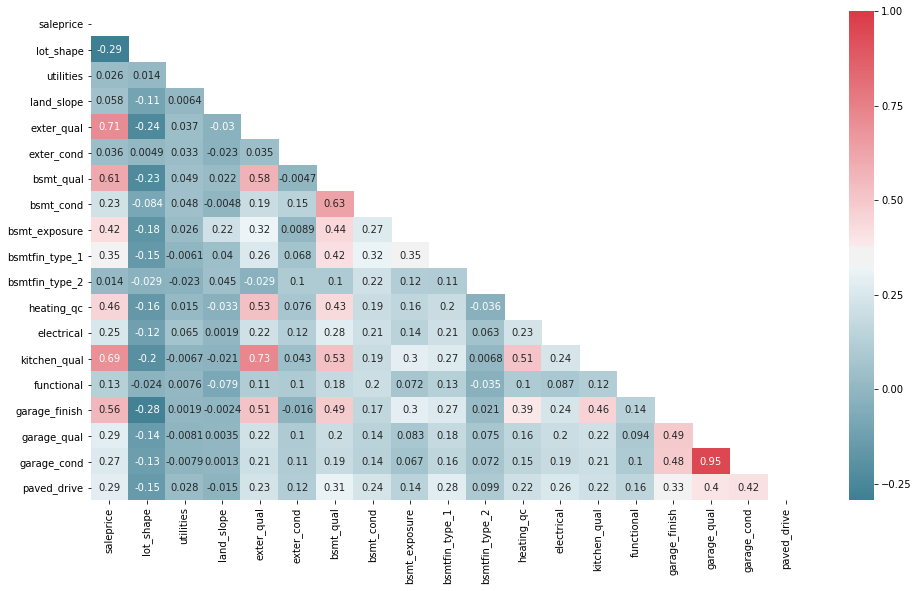

In [873]:
get_corr(df_s2,figsize=(16,9))

In [877]:
# Fill na values for ordinal coolumns that are not converted from categories
df_s3 = df[ordinal_cols_not_converted].fillna(df[ordinal_cols_not_converted].mean())

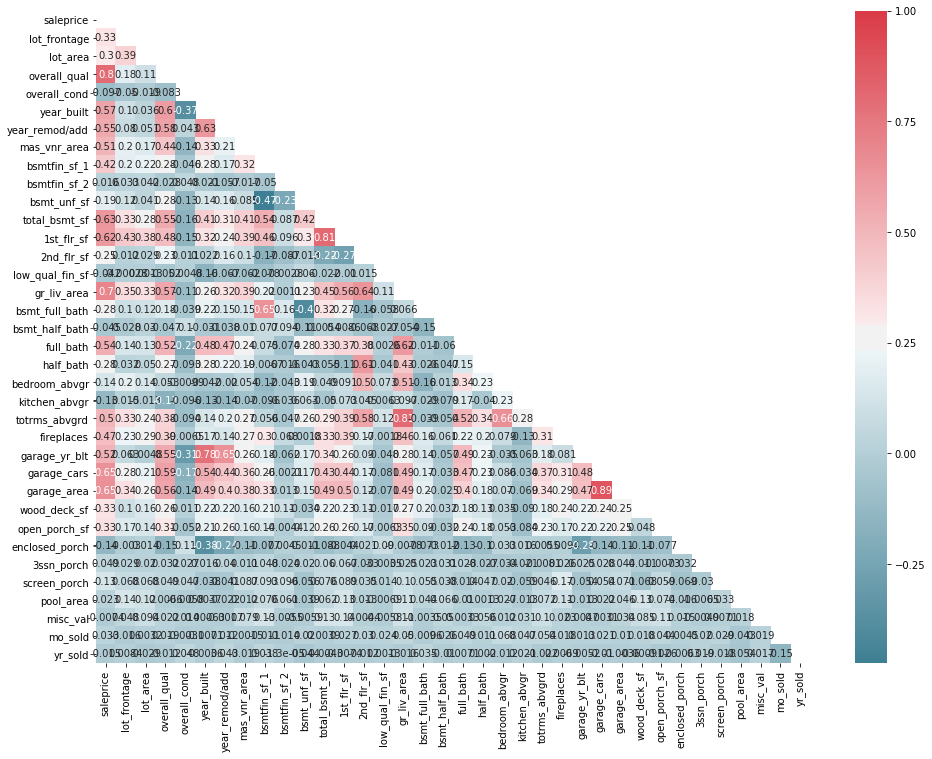

In [878]:
get_corr(df_s3)

In [879]:
df_comb = pd.concat( [pd.get_dummies(df_s1.astype(str),drop_first=True), df_s3, df_s2], axis=1)

In [881]:
# All columns are either integer or float
df_comb.dtypes.unique()

array([dtype('uint8'), dtype('float64'), dtype('int64')], dtype=object)

In [882]:
# Ensure that no nan values are present in the features
df_comb.isna().any().any()


False

#### Drop independent features that are highly correlated with each other

In [908]:
ordinals_corr_df = df_comb[ordinal_cols_to_be_converted+ordinal_cols_not_converted].corr()

In [929]:
ordinals_corr_df.abs().unstack()
high_corr_vars = ordinals_corr_df.abs().unstack().sort_values(kind='quicksort',ascending=False)

In [970]:
high_corr_colls = high_corr_vars[(high_corr_vars < 1) & (high_corr_vars > 0.5)][:100]
high_corr_colls

garage_qual     garage_cond       0.950493
garage_cond     garage_qual       0.950493
garage_area     garage_cars       0.893180
garage_cars     garage_area       0.893180
totrms_abvgrd   gr_liv_area       0.813333
gr_liv_area     totrms_abvgrd     0.813333
1st_flr_sf      total_bsmt_sf     0.808665
total_bsmt_sf   1st_flr_sf        0.808665
bsmtfin_type_2  bsmtfin_sf_2      0.777604
bsmtfin_sf_2    bsmtfin_type_2    0.777604
garage_yr_blt   year_built        0.776752
year_built      garage_yr_blt     0.776752
exter_qual      overall_qual      0.740257
overall_qual    exter_qual        0.740257
kitchen_qual    exter_qual        0.730562
exter_qual      kitchen_qual      0.730562
bsmtfin_type_1  bsmtfin_sf_1      0.698758
bsmtfin_sf_1    bsmtfin_type_1    0.698758
kitchen_qual    overall_qual      0.690639
overall_qual    kitchen_qual      0.690639
totrms_abvgrd   bedroom_abvgr     0.655439
bedroom_abvgr   totrms_abvgrd     0.655439
bsmt_qual       overall_qual      0.654071
overall_qua

In [969]:
high_corr_colls_tobe_removed = list({'garage_cond','garage_cars','totrms_abvgrd','total_bsmt_sf','bsmtfin_type_2','garage_yr_blt'
                               , 'overall_qual','kitchen_qual','bsmtfin_type_1','bedroom_abvgr','bsmt_qual',
                                'bsmtfin_sf_1','2nd_flr_sf','year_remod/add','garage_finish'})
high_corr_colls_tobe_removed

['totrms_abvgrd',
 'total_bsmt_sf',
 'overall_qual',
 'garage_cond',
 'bsmtfin_type_2',
 'bsmtfin_type_1',
 '2nd_flr_sf',
 'bedroom_abvgr',
 'garage_yr_blt',
 'year_remod/add',
 'garage_cars',
 'kitchen_qual',
 'bsmt_qual',
 'garage_finish',
 'bsmtfin_sf_1']

In [958]:
high_corr_colls

garage_qual     garage_cond       0.950493
garage_cond     garage_qual       0.950493
garage_area     garage_cars       0.893180
garage_cars     garage_area       0.893180
totrms_abvgrd   gr_liv_area       0.813333
gr_liv_area     totrms_abvgrd     0.813333
1st_flr_sf      total_bsmt_sf     0.808665
total_bsmt_sf   1st_flr_sf        0.808665
bsmtfin_type_2  bsmtfin_sf_2      0.777604
bsmtfin_sf_2    bsmtfin_type_2    0.777604
garage_yr_blt   year_built        0.776752
year_built      garage_yr_blt     0.776752
exter_qual      overall_qual      0.740257
overall_qual    exter_qual        0.740257
kitchen_qual    exter_qual        0.730562
exter_qual      kitchen_qual      0.730562
bsmtfin_type_1  bsmtfin_sf_1      0.698758
bsmtfin_sf_1    bsmtfin_type_1    0.698758
kitchen_qual    overall_qual      0.690639
overall_qual    kitchen_qual      0.690639
totrms_abvgrd   bedroom_abvgr     0.655439
bedroom_abvgr   totrms_abvgrd     0.655439
bsmt_qual       overall_qual      0.654071
overall_qua

In [956]:
def get_high_corr_cols(colls_tup):
#     all_colls = set()
    colls_to_drop=set()
    mirror_colls=set()
    for col1,col2 in colls_tup:
        if (col2 not in colls_to_drop) and (col1 not in mirror_colls) :
            colls_to_drop.add(col2)
            mirror_colls.add(col1)
    # Start extracting highly correlated columns from this list
    print(colls_to_drop)
get_high_corr_cols(high_corr_colls.index)

{'bsmtfin_type_1', '2nd_flr_sf', 'garage_area', 'bsmt_qual', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_cond', '1st_flr_sf', 'kitchen_qual', 'gr_liv_area', 'totrms_abvgrd', 'total_bsmt_sf', 'year_built', 'exter_qual', 'garage_qual', 'garage_cars', 'overall_qual', 'half_bath', 'garage_cond', 'bsmtfin_type_2', 'year_remod/add', 'garage_yr_blt'}


In [899]:
df_comb[np.abs(df_comb.corr()) > 0.5 ]

,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,...,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,functional,garage_finish,garage_qual,garage_cond,paved_drive
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [973]:
df_comb[[col for col in df_comb.columns if col not in high_corr_colls_tobe_removed]]

,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,...,land_slope,exter_qual,exter_cond,bsmt_cond,bsmt_exposure,heating_qc,electrical,functional,garage_qual,paved_drive
0,0,0,0,0,0,0,0,0,0,1,...,1,4,3,3,1,5,5,8,3,3
1,0,0,0,0,0,0,0,0,0,1,...,1,4,3,3,1,5,5,8,3,3
2,0,0,0,0,1,0,0,0,0,0,...,1,3,4,3,1,3,5,8,3,3
3,0,0,0,0,0,0,0,0,0,1,...,1,3,3,3,1,4,5,8,3,3
4,0,0,0,0,0,0,0,0,1,0,...,1,3,3,4,1,3,5,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,1,0,0,0,0,0,...,1,4,3,3,3,5,5,8,3,3
2047,0,0,0,0,0,1,0,0,0,0,...,1,3,3,3,1,5,5,8,3,3
2048,0,0,0,0,0,0,0,0,1,0,...,1,3,3,3,1,4,5,8,2,3
2049,0,0,0,0,1,0,0,0,0,0,...,1,3,3,3,1,3,5,8,3,3


In [974]:
final = df_comb[[col for col in df_comb.columns if col not in high_corr_colls_tobe_removed]].copy()

In [975]:
df['saleprice'].shape

(2051,)

In [976]:
final.shape

(2051, 185)

In [977]:
X = final.values
y = df['saleprice']

In [978]:
print("X Shape:{}\ny shape:{}".format(X.shape,y.shape))

X Shape:(2051, 185)
y shape:(2051,)


In [979]:
# Import necessary libraries
# Train test split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [980]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [981]:
print("X_train Shape:{}\ny_train shape:{}\n\nX_test shape:{}\ny_test shape:{}".format(X_train.shape,y_train.shape,X_test.shape
                                                                                     ,y_test.shape))

X_train Shape:(1640, 185)
y_train shape:(1640,)

X_test shape:(411, 185)
y_test shape:(411,)


In [982]:
# first normalize X_train and X_test
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [983]:
# Use lasso CV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

lasso_cv = LassoCV(cv=10, n_jobs=-1, n_alphas=200)
lasso_cv = lasso_cv.fit(X_train_sc,y_train)

In [984]:
lasso_cv.score(X_train_sc,y_train)

0.8809605458302102

In [985]:
lasso_cv.score(X_test_sc, y_test)

0.8791930324374415

In [986]:
lasso_coef_pd = pd.DataFrame(data=lasso_cv.coef_,index=final.columns, columns=['coef'])
lasso_coef_pd

,coef
ms_subclass_150,-757.461387
ms_subclass_160,-725.767402
ms_subclass_180,-0.000000
ms_subclass_190,-0.000000
ms_subclass_20,3173.167297
...,...
heating_qc,2821.847708
electrical,0.000000
functional,2814.490618
garage_qual,-0.000000


In [987]:
lasso_coef_pd['abs_coef'] = lasso_coef_pd['coef'].map(np.abs)

In [988]:
lasso_coef_pd.sort_values(by=['abs_coef'], ascending=False, inplace=True)
lasso_coef_pd.head(30)

,coef,abs_coef
gr_liv_area,23149.953843,23149.953843
exter_qual,12997.862117,12997.862117
neighborhood_NridgHt,12433.662836,12433.662836
neighborhood_StoneBr,8671.044991,8671.044991
year_built,7116.677144,7116.677144
bsmt_exposure,7030.411590,7030.411590
garage_area,6404.342900,6404.342900
bsmt_full_bath,6057.584597,6057.584597
neighborhood_NoRidge,5165.152802,5165.152802
fireplaces,5114.185754,5114.185754


In [989]:
lasso_coef_pd[lasso_coef_pd['abs_coef'] > 0]

,coef,abs_coef
gr_liv_area,23149.953843,23149.953843
exter_qual,12997.862117,12997.862117
neighborhood_NridgHt,12433.662836,12433.662836
neighborhood_StoneBr,8671.044991,8671.044991
year_built,7116.677144,7116.677144
bsmt_exposure,7030.411590,7030.411590
garage_area,6404.342900,6404.342900
bsmt_full_bath,6057.584597,6057.584597
neighborhood_NoRidge,5165.152802,5165.152802
fireplaces,5114.185754,5114.185754


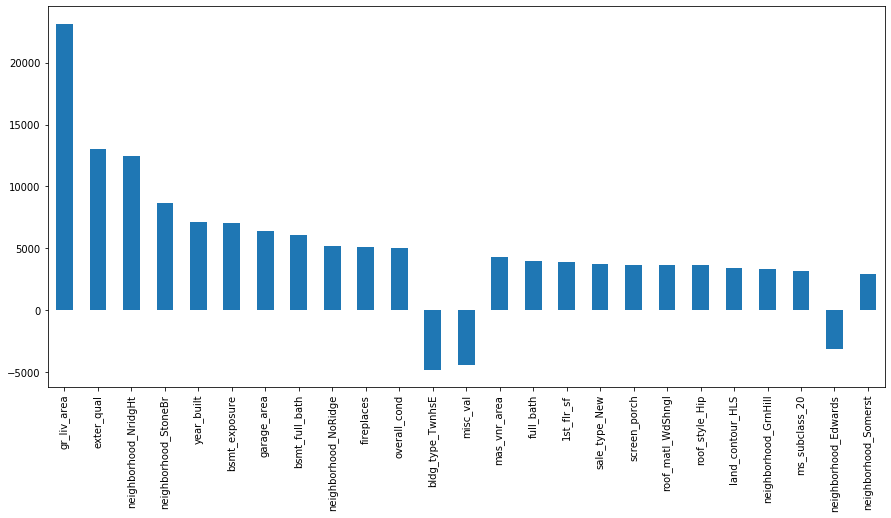

In [990]:
pd.Series(lasso_coef_pd.coef[:25], index=lasso_coef_pd.index[:25]).plot.bar(figsize=(15, 7))

In [875]:
[ (col,var) for col,var in df.var().items() if var < 10 ]

[('overall_qual', 2.0342476602727793),
 ('overall_cond', 1.2199141406333436),
 ('bsmt_full_bath', 0.27318728266837156),
 ('bsmt_half_bath', 0.06335550497193708),
 ('full_bath', 0.30170791166713),
 ('half_bath', 0.251043750222965),
 ('bedroom_abvgr', 0.683297855894229),
 ('kitchen_abvgr', 0.04401184431151766),
 ('totrms_abvgrd', 2.4343018872411872),
 ('fireplaces', 0.40770308356423646),
 ('garage_cars', 0.5845173731385971),
 ('mo_sold', 7.533574817756958),
 ('yr_sold', 1.7213808849936916)]

### Generate predictions on test set


In [1071]:
# Load the test set
test_pd_raw = pd.read_csv('data/test.csv')

In [1072]:
test_pd_raw

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
875,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
876,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


# Perform transformations on test csv
General Transformation Steps
1. Rename all columns to lowercase
1. Fill up [nominal_cols] with 'na' - create test_s1
2. Convert ordinal columns that needed to be converted into numerical columns using our custom mapper, create test_s2 
3. Fill up ordinal columns that do not need to be converted to numerical values (already in numeric) with the mean, create test_s3 

In [1073]:
test_pd_raw.columns = [ col.strip().replace(" ","_").lower() for col in test_pd_raw.columns]

In [1074]:
# Check for null values in test set
test_pd_raw.isnull().sum() 

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       160
lot_area             0
street               0
alley              821
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         1
mas_vnr_area         1
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           25
bsmt_cond           25
bsmt_exposure       25
bsmtfin_type_1      25
bsmtfin_sf_1         0
bsmtfin_type_2      25
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

In [1075]:
# Drop collumns that have mostly missing data (from test set)
test_pd = test_pd_raw[[col for col in test_pd.columns if col not in drop_cols]]

In [1076]:
# Engineer nominal columns in test_s1
test_s1 =test_pd[nominal_cols].fillna('na')
test_s1['ms_subclass'] = test_s1['ms_subclass'].astype(object)

In [1077]:
test_pd.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area',


In [1078]:
test_s1.columns

Index(['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'lot_config',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air',
       'garage_type', 'sale_type'],
      dtype='object')

In [1079]:
# Engineer ordinal columns in test_s2
test_s2 = pd.DataFrame()
for col in ordinal_cols_to_be_converted:
    test_s2[col]= test_pd[col].map(lambda x: to_ord(col,x) )

In [1080]:
# Engineer ordinal columns that are not converted
# Fill na values for ordinal coolumns that are not converted from categories
test_s3 = test_pd[ordinal_cols_not_converted].fillna(test_pd[ordinal_cols_not_converted].mean())

In [1081]:
#Combine columns and get dummies
test_comb = pd.concat( [pd.get_dummies(test_s1.astype(str),drop_first=True), test_s3, test_s2], axis=1)

In [1082]:
# All columns are either integer or float
test_comb.dtypes.unique()

array([dtype('uint8'), dtype('float64'), dtype('int64')], dtype=object)

In [1083]:
# Ensure that no nan values are present in the features
test_comb.isna().any().any()


False

In [1084]:
test_comb.shape

(879, 193)

In [1085]:
df_comb.columns

Index(['ms_subclass_150', 'ms_subclass_160', 'ms_subclass_180',
       'ms_subclass_190', 'ms_subclass_20', 'ms_subclass_30', 'ms_subclass_40',
       'ms_subclass_45', 'ms_subclass_50', 'ms_subclass_60',
       ...
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical',
       'kitchen_qual', 'functional', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive'],
      dtype='object', length=200)

In [1086]:
# Ensure that the columns are in the same order, and match
test_comb.columns

Index(['ms_subclass_160', 'ms_subclass_180', 'ms_subclass_190',
       'ms_subclass_20', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45',
       'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70',
       ...
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical',
       'kitchen_qual', 'functional', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive'],
      dtype='object', length=193)

In [1087]:
test_X_final = test_comb[[col for col in test_comb.columns if col not in high_corr_colls_tobe_removed]].copy()

In [1088]:
test_X_final.shape

(879, 178)

In [1089]:
final.shape

(2051, 185)

In [1090]:
missing_cols = set(final.columns) - set(test_X_final.columns)

In [1091]:
# Fix the missing columns in test set, and drop the columns that weren't available in the training set
for c in missing_cols:
    test_X_final[c] = 0
test_X_final = test_X_final[final.columns]

In [1092]:
test_X_final

,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,...,land_slope,exter_qual,exter_cond,bsmt_cond,bsmt_exposure,heating_qc,electrical,functional,garage_qual,paved_drive
0,0,0,0,1,0,0,0,0,0,0,...,1,3,2,3,1,4,2,8,1,3
1,0,0,0,0,0,0,0,0,0,0,...,1,3,3,3,1,3,5,8,3,3
2,0,0,0,0,0,0,0,0,0,1,...,1,4,3,4,3,5,5,8,3,3
3,0,0,0,0,0,1,0,0,0,0,...,1,4,3,3,1,3,5,8,2,1
4,0,0,0,0,1,0,0,0,0,0,...,1,3,3,3,1,4,5,8,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,0,0,0,0,0,0,0,0,0,1,...,1,3,3,3,1,3,5,8,3,3
875,0,0,0,0,0,0,0,0,0,1,...,1,4,4,3,1,5,5,8,3,3
876,0,0,0,0,1,0,0,0,0,0,...,1,3,3,3,1,5,5,8,3,3
877,0,0,0,0,1,0,0,0,0,0,...,1,3,3,3,1,3,5,8,3,3


In [1093]:
# Use the existing scaler to normalize X_train and X_test
test_X_final_sc = ss.transform(test_X_final)

In [1095]:
# Generate predictions for test_X_final_sc
lasso_preds = lasso_cv.predict(test_X_final_sc)

In [1098]:
lasso_preds.shape

(879,)

In [1097]:
test_pd_raw

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
875,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
876,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


In [1099]:
lasso_preds_df = pd.DataFrame({'Id':test_pd_raw['id'],'SalePrice':lasso_preds })

In [1103]:
lasso_preds_df.to_csv('lasso_preds.csv',index=False)

In [1041]:
[col for col in test_X_final if col not in final.columns ]

['roof_matl_Metal',
 'roof_matl_Roll',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'mas_vnr_type_CBlock',
 'mas_vnr_type_None',
 'heating_GasA',
 'sale_type_VWD']

In [1043]:
[col for col in final.columns if col not in test_X_final]

['ms_subclass_150',
 'ms_zoning_C (all)',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'condition_2_Feedr',
 'condition_2_RRAe',
 'condition_2_RRAn',
 'condition_2_RRNn',
 'roof_matl_CompShg',
 'roof_matl_Membran',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone',
 'heating_OthW',
 'heating_Wall']

In [1051]:
test_s1_dummies_dropped_cols = [ col for col in pd.get_dummies(test_s1.astype(str),drop_first=False).columns if col not in pd.get_dummies(test_s1.astype(str),drop_first=True).columns]

In [1052]:
test_s1_dummies_dropped_cols

['ms_subclass_120',
 'ms_zoning_C (all)',
 'street_Grvl',
 'land_contour_Bnk',
 'lot_config_Corner',
 'neighborhood_Blmngtn',
 'condition_1_Artery',
 'condition_2_Feedr',
 'bldg_type_1Fam',
 'house_style_1.5Fin',
 'roof_style_Flat',
 'roof_matl_CompShg',
 'exterior_1st_AsbShng',
 'exterior_2nd_AsbShng',
 'mas_vnr_type_BrkCmn',
 'foundation_BrkTil',
 'heating_Floor',
 'central_air_N',
 'garage_type_2Types',
 'sale_type_COD']

In [1049]:
df_s1_dummies_dropped_cols = [ col for col in pd.get_dummies(df_s1.astype(str)).columns if col not in pd.get_dummies(df_s1.astype(str),drop_first=True).columns ]

In [1053]:
# Columns available in 
[col for col in df_s1_dummies_dropped_cols if col not in test_s1_dummies_dropped_cols]

['ms_zoning_A (agr)',
 'condition_2_Artery',
 'roof_matl_ClyTile',
 'heating_GasA']

In [1055]:
[col for col in test_s1_dummies_dropped_cols if col not in df_s1_dummies_dropped_cols ]

['ms_zoning_C (all)',
 'condition_2_Feedr',
 'roof_matl_CompShg',
 'heating_Floor']